# TSSG Fast Learning Competition: Earthquakes*

*A. Bagnall, J. Lines, W. Vickers and E. Keogh, The UEA & UCR Time Series Classification Repository,
www.timeseriesclassification.com

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
import fastai
fastai.__version__

'1.0.28'

In [3]:
import zipfile
import tempfile
import shutil
import os
import sys
import csv
try:
    from urllib import urlretrieve
except ImportError:
    from urllib.request import urlretrieve
try:
    from zipfile import BadZipFile as BadZipFile
except ImportError:
    from zipfile import BadZipfile as BadZipFile

from tslearn.utils import to_time_series_dataset

In [4]:
def extract_from_zip_url(url, target_dir=None, verbose=False):
    """Download a zip file from its URL and unzip it."""
    fname = os.path.basename(url)
    tmpdir = tempfile.mkdtemp()
    local_zip_fname = os.path.join(tmpdir, fname)
    urlretrieve(url, local_zip_fname)
    try:
        if not os.path.exists(target_dir):
            os.makedirs(target_dir)
        zipfile.ZipFile(local_zip_fname, "r").extractall(path=target_dir)
        shutil.rmtree(tmpdir)
        if verbose:
            print("Successfully extracted file %s to path %s" % (local_zip_fname, target_dir))
        return target_dir
    except BadZipFile:
        shutil.rmtree(tmpdir)
        if verbose:
            sys.stderr.write("Corrupted zip file encountered, aborting.\n")
        return None

In [5]:
def prepare_dataset(dataset_name, target_dir):
    '''
    Download selected UCR dataset, unzip files to target dir, 
    read train & test files, and normalizes data
    '''

    full_path = os.path.join(target_dir, dataset_name)
    fname_train = dataset_name + "_TRAIN.txt"
    fname_test = dataset_name + "_TEST.txt"
    if not os.path.exists(os.path.join(full_path, fname_train)) or \
        not os.path.exists(os.path.join(full_path, fname_test)):
        url = "http://www.timeseriesclassification.com/Downloads/%s.zip" % dataset_name
        for fname in [fname_train, fname_test]:
            if os.path.exists(os.path.join(full_path, fname)):
                os.remove(os.path.join(full_path, fname))
        extract_from_zip_url(url, target_dir=full_path, verbose=False)
    try:
        data_train = np.loadtxt(os.path.join(full_path, fname_train), delimiter=None)
        data_test = np.loadtxt(os.path.join(full_path, fname_test), delimiter=None)
    except:
        return None, None, None, None

    X_train = to_time_series_dataset(data_train[:, 1:])
    y_train = data_train[:, 0].astype(np.int)
    X_test = to_time_series_dataset(data_test[:, 1:])
    y_test = data_test[:, 0].astype(np.int)

    X_train = np.squeeze(X_train)
    # scale the values
    X_train_mean = np.mean(X_train)
    X_train_std = np.std(X_train)
    X_train = (X_train - X_train_mean) / X_train_std

    nb_classes = len(np.unique(y_train))
    y_train = ((y_train - y_train.min()) / (y_train.max() - y_train.min()) * (nb_classes - 1)).astype(int)
    y_train = y_train.ravel()

    X_test = np.squeeze(X_test)
    # scale the values
    X_test = (X_test - X_train_mean) / X_train_std

    y_test = ((y_test - y_test.min()) / (y_test.max() - y_test.min()) * (nb_classes - 1)).astype(int)
    y_test = y_test.ravel()

    return X_train, y_train, X_test, y_test

## Prepare data

In [6]:
SEL_DATASET = 'Earthquakes'
TGT_DIR = Path('my_data/UCR_univariate/' + SEL_DATASET)

prepare_dataset() will download url to selected dataset, unzip file, load them to sel target dir, prepare train & test sets and normalize data.

In [7]:
X_train, y_train, X_test, y_test = prepare_dataset(SEL_DATASET, TGT_DIR)

In [8]:
print("Number of train samples: ", X_train.shape[0], "Number of test samples: ", X_test.shape[0])
print("Sequence length: ", X_train.shape[-1])

Number of train samples:  322 Number of test samples:  139
Sequence length:  512


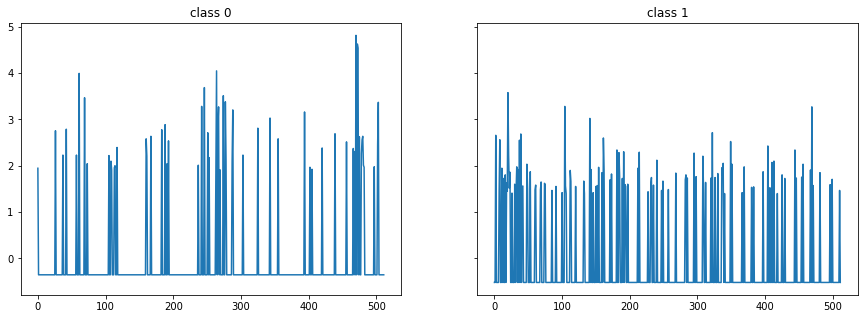

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.plot(X_train[1])
ax1.set_title('class ' + str(y_train[1]))
ax2.plot(X_train[0])
ax2.set_title('class ' + str(y_train[0]))
plt.show()

You are now ready to start creating working on this dataset!!

According to the UCR website, the current state of the art accuracy on this dataset is 0.835526316, achieved with a non deep learning model ('HIVE-COTE'). Will you be able to improve that?